In [325]:
import pandas as pd
import matplotlib.pyplot as plt

In [326]:
df = pd.read_csv('BusinessIndex.csv')

In [327]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,ZAF,BCI,AMPLITUD,LTRENDIDX,M,1974-06,102.2240,NaN
1,ZAF,BCI,AMPLITUD,LTRENDIDX,M,1974-07,102.0984,NaN
2,ZAF,BCI,AMPLITUD,LTRENDIDX,M,1974-08,101.9857,NaN
3,ZAF,BCI,AMPLITUD,LTRENDIDX,M,1974-09,101.9060,NaN
4,ZAF,BCI,AMPLITUD,LTRENDIDX,M,1974-10,101.8685,NaN


In [328]:
#df.drop(columns="INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes", inplace=True)
df = df.drop(columns=["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"])

In [329]:
df['TIME'] = pd.to_datetime(df.TIME)

#df['LOCATION] to string
df['LOCATION'] = df['LOCATION'].astype(str)

In [330]:
df.head()

,LOCATION,TIME,Value
0,ZAF,1974-06-01,102.2240
1,ZAF,1974-07-01,102.0984
2,ZAF,1974-08-01,101.9857
3,ZAF,1974-09-01,101.9060
4,ZAF,1974-10-01,101.8685


In [331]:
#filter for USA, IND, CHN and RUS
df = df[df['LOCATION'].str.contains("USA|IND|CHN")]
df = df[df['TIME'] > '2000-01-01']

KeyError: 'LOCATION'

In [333]:
#pivot df to get 3 columns for each country and time to be rows
df = df.pivot(index='TIME', columns='LOCATION', values='Value')

In [334]:
df.head()

LOCATION,CHN,IND,USA
TIME,,,
2000-02-01,100.3835,NaN,100.59880
2000-03-01,100.2651,NaN,100.40190
2000-04-01,100.2020,NaN,100.20840
2000-05-01,100.2816,101.5067,99.97270
2000-06-01,100.5451,102.5119,99.75106


<Figure size 1008x864 with 0 Axes>

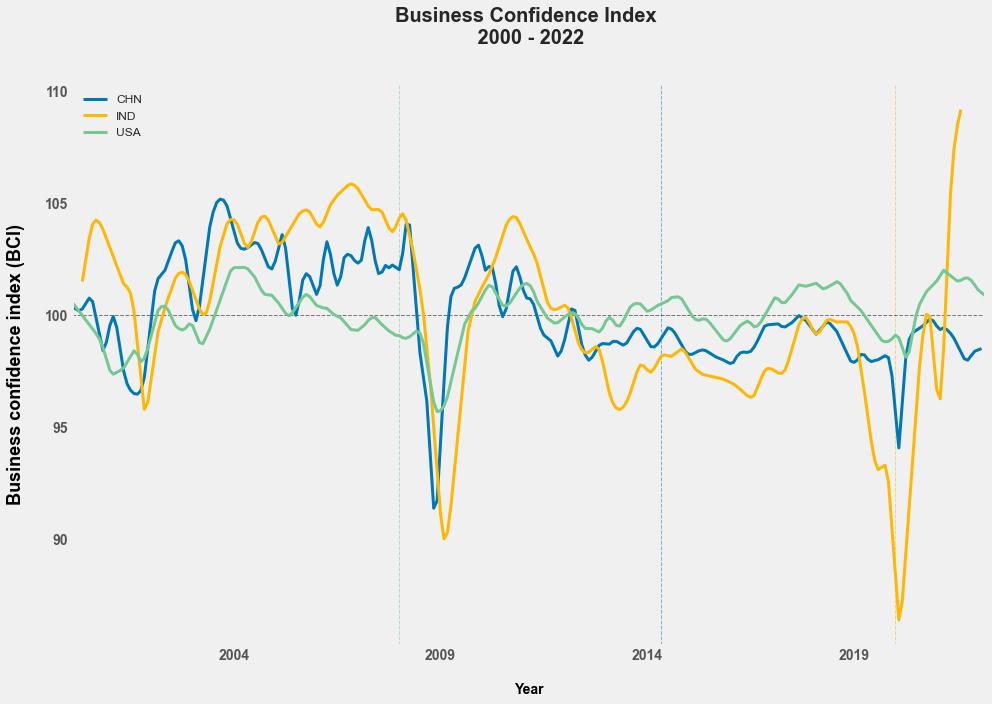

In [341]:
#set figu size and plot style
fig = plt.figure(figsize=(14, 12))
plt.style.use('fivethirtyeight')


# #line filled chart
ax = df.plot(linewidth=3, figsize=(14, 10), color=['#0077b6', '#ffb703', '#76c893'])
ax.legend().set_visible(False)

#legend remove

# plt.fill_between(df.index, df['IND'], df['CHN'], color = "#0077b6", alpha=0.6, label='IND')
# plt.fill_between(df.index, df['CHN'], df['USA'],  color = "#ffb703", alpha=0.6, label='CHN')
# plt.fill_between(df.index, df['USA'], df['IND'], color = "#76c893", alpha=0.6, label='USA')

#annotate with a line for year 2008 "Recession" and 2020 "Covid-19"
plt.axvline(x=pd.to_datetime('2008-01-01'), color='#76c893', linestyle='--', linewidth=1, label='Recession', zorder = 0, alpha=0.5)
plt.axvline(x=pd.to_datetime('2020-01-01'), color='#ffb703', linestyle='--', linewidth=1, label='Covid-19', zorder = 0, alpha=0.5)
plt.axvline(x=pd.to_datetime('2014-05-26'), color='#0077b6', linestyle='--', linewidth=1, label='India Elected \n Modi as PM', zorder = 0, alpha=0.5)

#average liine of 100 on the chart
plt.axhline(y=100, color='black', linestyle='--', linewidth=1, label='Average', zorder = 0, alpha=0.5)

plt.title('Business Confidence Index \n 2000 - 2022', fontsize = 20, fontweight = 'bold', pad=40)
plt.xlabel('Year', fontsize = 14, labelpad=20, fontweight='bold', color='black')
plt.ylabel('Business confidence index (BCI)', fontsize = 18, color='black', labelpad=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(False)

#get legend labels
labels = [item.get_label() for item in ax.get_legend().get_lines()]

# #use first 3 labels for legend
plt.legend(labels[:3], loc='best', fontsize=12, ncol=1, frameon=False)

plt.savefig('BusinessIndexFinal.png', dpi=300)


